# Loading And Describtions

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler # Import if not already done
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, cross_validate # Import for CV

from sklearn.tree import DecisionTreeClassifier # The model we're using
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif, SelectKBest, chi2, RFE
from sklearn.datasets import load_breast_cancer
import pandas as pd
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import cross_val_score

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()

# Convert to pandas DataFrame for easier exploration
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable (labels)
df['target'] = data.target
# print(data.keys())
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

#  Preprocessing

##  Outlier detection (IQR & Z-score)


In [ ]:
iqr = df.quantile(0.75) - df.quantile(0.25)

print("IQR for each feature:")
print(iqr.round(2))

IQR for each feature:
mean radius                  4.08
mean texture                 5.63
mean perimeter              28.93
mean area                  362.40
mean smoothness              0.02
mean compactness             0.07
mean concavity               0.10
mean concave points          0.05
mean symmetry                0.03
mean fractal dimension       0.01
radius error                 0.25
texture error                0.64
perimeter error              1.75
area error                  27.34
smoothness error             0.00
compactness error            0.02
concavity error              0.03
concave points error         0.01
symmetry error               0.01
fractal dimension error      0.00
worst radius                 5.78
worst texture                8.64
worst perimeter             41.29
worst area                 568.70
worst smoothness             0.03
worst compactness            0.19
worst concavity              0.27
worst concave points         0.10
worst symmetry            

In [ ]:
outlier_z = (np.abs(df.apply(zscore)) > 3).sum()

print("Outlier count (|Z| > 3) for each feature:")
print(outlier_z)

Outlier count (|Z| > 3) for each feature:
mean radius                 5
mean texture                4
mean perimeter              7
mean area                   8
mean smoothness             5
mean compactness            9
mean concavity              9
mean concave points         6
mean symmetry               5
mean fractal dimension      7
radius error                7
texture error               9
perimeter error             8
area error                  6
smoothness error            7
compactness error          12
concavity error             6
concave points error        6
symmetry error             11
fractal dimension error    10
worst radius                6
worst texture               4
worst perimeter             6
worst area                 10
worst smoothness            3
worst compactness          10
worst concavity             7
worst concave points        0
worst symmetry              9
worst fractal dimension     9
target                      0
dtype: int64


## Visualisation

<Figure size 1600x2400 with 0 Axes>

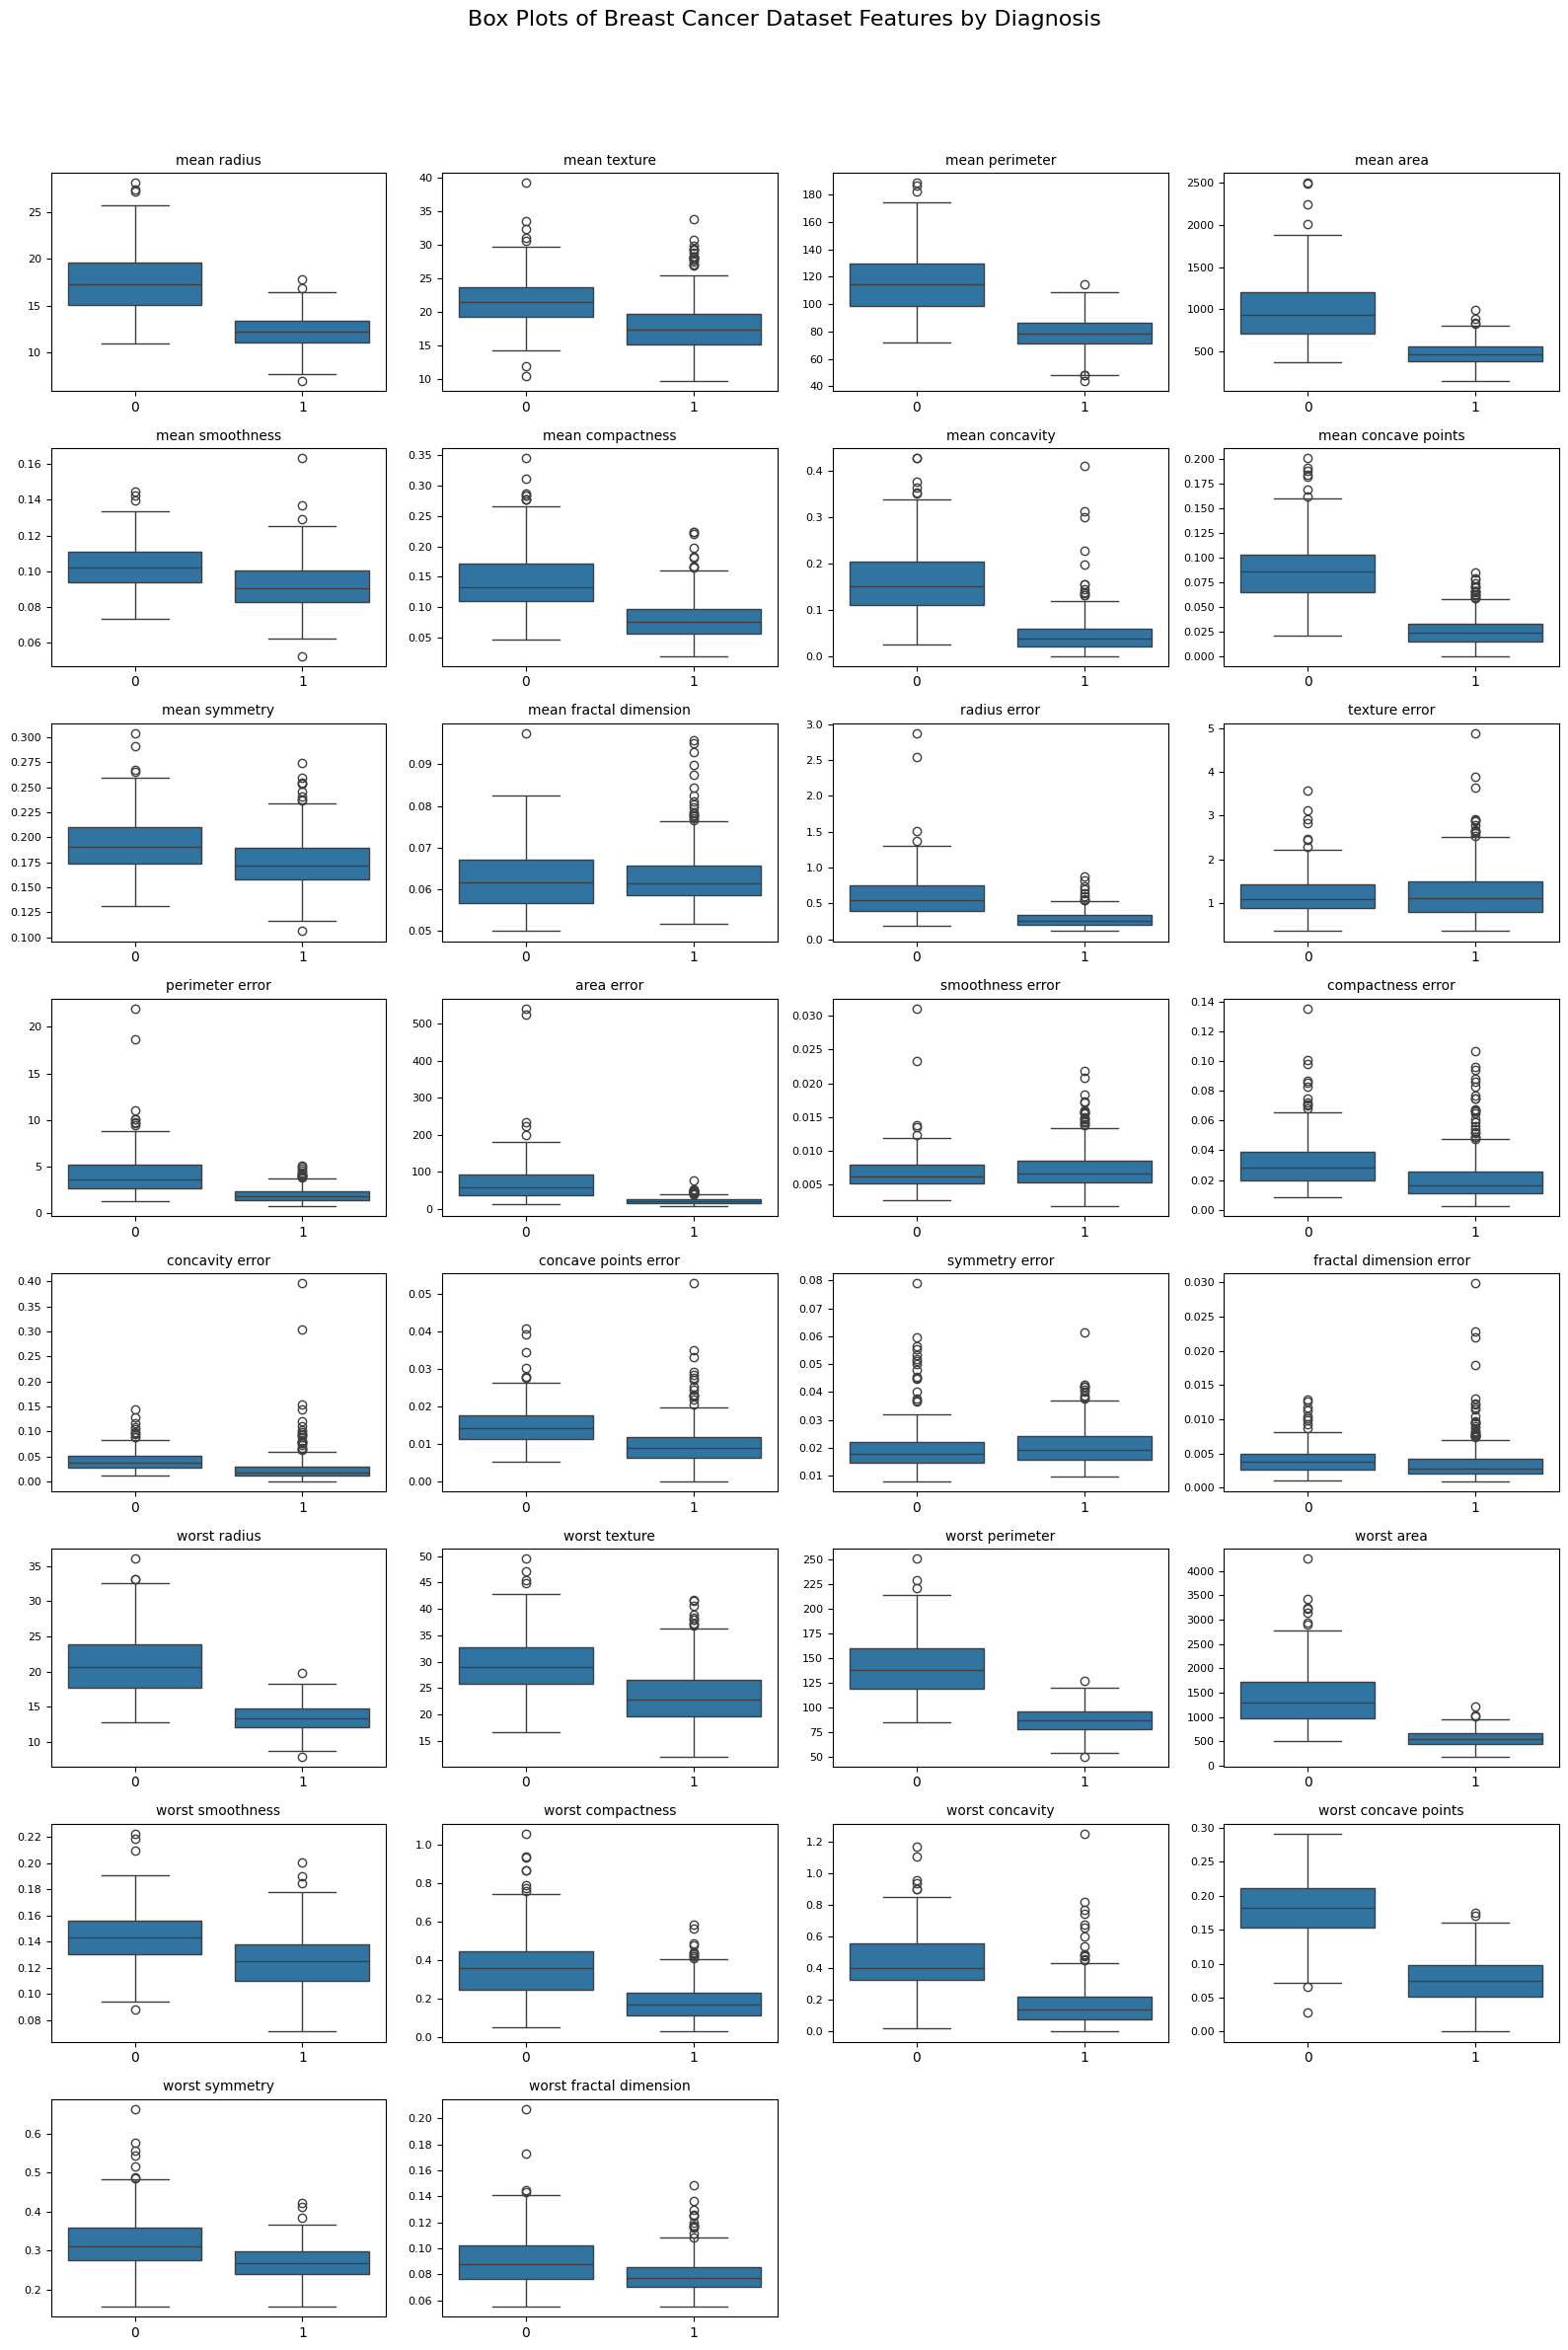

In [ ]:
plt.figure(figsize=(4 * 4, (df.shape[1] + 4 - 1) // 4 * 3)) # Adjust figure size for better readability
plt.suptitle('Box Plots of Breast Cancer Dataset Features', fontsize=16, y=1.02) # Overall title

# Iterate through each feature and create a box plot
# for i, feature in enumerate(df.columns):
#     plt.subplot(num_rows, num_cols, i + 1) # Create subplot for current feature
#     sns.boxplot(y=df[feature]) # Create box plot for the feature
#     plt.title(feature, fontsize=10) # Set title for the subplot (feature name)
#     plt.ylabel('') # Remove y-axis label to avoid clutter, as feature name is title
#     plt.tick_params(axis='y', labelsize=8) # Adjust y-axis tick label size

# plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent titles from overlapping
# plt.show()

# You can also plot box plots grouped by diagnosis if you added the target column:
plt.figure(figsize=(4 * 4, (df.shape[1] + 4 - 1) // 4 * 3))
plt.suptitle('Box Plots of Breast Cancer Dataset Features by Diagnosis', fontsize=16, y=1.02)
for i, feature in enumerate(data.feature_names):
    plt.subplot((df.shape[1] + 4 - 1) // 4, 4, i + 1)
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(feature, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.tick_params(axis='y', labelsize=8)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


## PCA and LDA

In [ ]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='diagnosis')

print("\n--- Applying PCA/LDA with Train-Test Split (Best Practice) ---")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_scaled = StandardScaler().fit_transform(X_train)

X_test_scaled = StandardScaler().fit_transform(X_test)

print("\nShape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)

pca_split = PCA(n_components=2)
X_train_pca = pca_split.fit_transform(X_train_scaled)
X_test_pca = pca_split.transform(X_test_scaled) # Transform test data using fitted PCA

print("\nShape of X_train_pca:", X_train_pca.shape)
print("Shape of X_test_pca:", X_test_pca.shape)
print(f"PCA (split) Explained variance ratio: {pca_split.explained_variance_ratio_.sum():.2f}")


lda_split = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda_split.fit_transform(X_train_scaled, y_train)
X_test_lda = lda_split.transform(X_test_scaled)

print("\nShape of X_train_lda:", X_train_lda.shape)
print("Shape of X_test_lda:", X_test_lda.shape)



--- Applying PCA/LDA with Train-Test Split (Best Practice) ---

Shape of X_train_scaled: (455, 30)
Shape of X_test_scaled: (114, 30)

Shape of X_train_pca: (455, 2)
Shape of X_test_pca: (114, 2)
PCA (split) Explained variance ratio: 0.63

Shape of X_train_lda: (455, 1)
Shape of X_test_lda: (114, 1)


# Feature selection

## MI

In [ ]:
mi_scores = mutual_info_classif(X_train_scaled, y_train)
mi_selected_features = np.argsort(mi_scores)[-10:]
X_train_mi = X_train_scaled[:, mi_selected_features]
X_test_mi = X_test_scaled[:, mi_selected_features]

feature_names = X.columns
mi_scores_df = pd.DataFrame({'Feature': feature_names,'MI Score': mi_scores})
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)
top_features = mi_scores_df.head(10)
print(top_features)

# Plot Mutual Information Scores
# plt.figure(figsize=(10, 6))
# plt.barh(X.columns, mi_scores)
# plt.xlabel('Mutual Information Score')
# plt.title('Mutual Information Scores for Each Feature')
# plt.show()

                 Feature  MI Score
22       worst perimeter  0.472356
20          worst radius  0.460914
23            worst area  0.459693
7    mean concave points  0.445763
27  worst concave points  0.442733
2         mean perimeter  0.412495
0            mean radius  0.361731
3              mean area  0.359414
6         mean concavity  0.353542
13            area error  0.339699


## RFE

In [ ]:
from sklearn.linear_model import LogisticRegression
rfe = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)
X_train_rfe = rfe.transform(X_train_scaled)
X_test_rfe = rfe.transform(X_test_scaled)

rfe_ranking = rfe.ranking_
rfe_scores_df = pd.DataFrame({'Feature': feature_names,'RFE Score': rfe_ranking})
rfe_scores_df = rfe_scores_df.sort_values(by='RFE Score', ascending=True)
top_features = rfe_scores_df.head(10)
print(top_features)

# plt.figure(figsize=(10, 6))
# plt.barh(X.columns, rfe_ranking)
# plt.xlabel('RFE Ranking')
# plt.title('RFE Feature Ranking')
# plt.show()

                 Feature  RFE Score
3              mean area          1
10          radius error          1
13            area error          1
26       worst concavity          1
20          worst radius          1
21         worst texture          1
22       worst perimeter          1
23            worst area          1
27  worst concave points          1
24      worst smoothness          1


## Chi-square

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

k = 10
chi_selector = SelectKBest(score_func=chi2, k=k)
X_train_chi2 = chi_selector.fit_transform(X_train_scaled, y_train)
X_test_chi2 = chi_selector.transform(X_test_scaled)

selected_features = X.columns[chi_selector.get_support()]
chi_scores = chi_selector.scores_

chi_scores_df = pd.DataFrame({'Feature': feature_names,'CHI Score': chi_scores})
chi_scores_df = chi_scores_df.sort_values(by='CHI Score', ascending=False)
chi_top_features = chi_scores_df.head(10)
print(chi_top_features)

chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square Score': chi_scores
}).sort_values(by='Chi-Square Score', ascending=False)


# Step 4: Visualize the top features
# plt.figure(figsize=(10, 6))
# plt.barh(selected_features, chi_scores[chi_selector.get_support()], color="skyblue")
# plt.xlabel('Chi-Square Score')
# plt.title('Top Features Selected by Chi-Square Test Debugged')
# plt.gca().invert_yaxis()  # Invert y-axis to show highest score at the top
# plt.show()


                 Feature  CHI Score
7    mean concave points  43.014866
27  worst concave points  38.919172
6         mean concavity  38.169774
23            worst area  34.045640
22       worst perimeter  30.528326
20          worst radius  29.960403
26       worst concavity  27.309722
3              mean area  23.111138
2         mean perimeter  21.266644
0            mean radius  19.908251


## Anova (k-best)

In [ ]:
selector = SelectKBest(score_func=chi2, k=10) # Using chi2 as score_func for consistency with above
# You could also use score_func=f_classif for numerical features
selector.fit(X, y) # Fit on original X

# Get selected features
selected_features_mask = selector.get_support()
top_selectkbest_features = X.columns[selected_features_mask].tolist()
# print("Top 10 features by SelectKBest (chi2 score_func):\n", top_selectkbest_features)
print("Scores for Top 10 (from SelectKBest): \n",  pd.Series(selector.scores_, index=X.columns)[selected_features_mask].sort_values(ascending=False))
X_test_Kbest = X_test[top_selectkbest_features]
X_train_Kbest = X_train[top_selectkbest_features]

Scores for Top 10 (from SelectKBest): 
 worst area         112598.431564
mean area           53991.655924
area error           8758.504705
worst perimeter      3665.035416
mean perimeter       2011.102864
worst radius          491.689157
mean radius           266.104917
perimeter error       250.571896
worst texture         174.449400
mean texture           93.897508
dtype: float64


# Cross validation

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1'] # Metrics to collect

# Clasification

In [ ]:
feature_sets = {
    "Original": (X_train, X_test),
    "Scaled": (X_train_scaled_df, X_test_scaled_df),
    "MI": (X_train_mi, X_test_mi),
    "RFE": (X_train_rfe, X_test_rfe),
    "Chi2": (X_train_chi2, X_test_chi2),
    "KBest": (X_train_Kbest, X_test_Kbest),
    "PCA": (X_train_pca, X_test_pca),
    "LDA": (X_train_lda, X_test_lda),}

classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Bagging": BaggingClassifier(random_state=42)
}

all_results = []

for model_name, model in classifiers.items():
    print(f"\n===== Training and Evaluating: {model_name} with Cross-Validation =====")
    for feature_set_name, X_data_for_cv in feature_sets.items():
        # print(f"\n--- Using Feature Set: {feature_set_name} ---")
        # print(f"Data shape for CV: {X_data_for_cv.shape}")

        try:
            # Perform cross-validation
            cv_results = cross_validate(model, X_data_for_cv, y, cv=cv, scoring=scoring, n_jobs=-1)

            # Calculate mean scores across all folds
            avg_accuracy = cv_results['test_accuracy'].mean()
            avg_precision = cv_results['test_precision'].mean()
            avg_recall = cv_results['test_recall'].mean()
            avg_f1 = cv_results['test_f1'].mean()

            # Store the average metrics in the results list
            all_results.append({
                'Model': model_name,
                'Feature Set': feature_set_name,
                'Accuracy': avg_accuracy,
                'Precision': avg_precision,
                'Recall': avg_recall,
                'F1-Score': avg_f1
            })

            # print(f"Avg Accuracy: {avg_accuracy:.4f}")
            # print(f"Avg Precision: {avg_precision:.4f}")
            # print(f"Avg Recall: {avg_recall:.4f}")
            # print(f"Avg F1-Score: {avg_f1:.4f}")

        except Exception as e:
            print(f"Error during CV for {model_name} with {feature_set_name} features: {e}")
            all_results.append({
                'Model': model_name,
                'Feature Set': feature_set_name,
                'Accuracy': None, 'Precision': None, 'Recall': None, 'F1-Score': None
            })



# print("Comprehensive Model Performance Summary")
# results_df = pd.DataFrame(all_results)
# print(results_df.round(4))

print("\n--- Sorted by Accuracy (Descending) ---")
print(results_df.sort_values(by=['Recall', 'Accuracy'], ascending=False).round(4))


===== Training and Evaluating: Decision Tree with Cross-Validation =====
Error during CV for Decision Tree with Original features: Found input variables with inconsistent numbers of samples: [2, 569]
Error during CV for Decision Tree with Scaled features: Found input variables with inconsistent numbers of samples: [2, 569]
Error during CV for Decision Tree with MI features: Found input variables with inconsistent numbers of samples: [2, 569]
Error during CV for Decision Tree with RFE features: Found input variables with inconsistent numbers of samples: [2, 569]
Error during CV for Decision Tree with Chi2 features: Found input variables with inconsistent numbers of samples: [2, 569]
Error during CV for Decision Tree with KBest features: Found input variables with inconsistent numbers of samples: [2, 569]
Error during CV for Decision Tree with PCA features: Found input variables with inconsistent numbers of samples: [2, 569]
Error during CV for Decision Tree with LDA features: Found inp

NameError: name 'results_df' is not defined

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold, cross_validate # Import for CV
from sklearn.preprocessing import StandardScaler

# Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Used as classifier here
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression

# Feature Selection/Dimensionality Reduction imports (needed to recreate feature sets)
from sklearn.feature_selection import SelectKBest, mutual_info_classif, chi2, RFE
from sklearn.decomposition import PCA


# --- 0. Load Data and Prepare All Feature Sets (for Cross-Validation) ---
# Here, we'll prepare full datasets for each feature selection/reduction method,
# as cross-validation will handle the internal train/test splits.

# Load original data
cancer = load_breast_cancer()
X_full = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_full = pd.Series(cancer.target, name='diagnosis')

print("Original Full Data Shape (X_full):", X_full.shape)
print("Original Full Target Shape (y_full):", y_full.shape)
print("-" * 50)

# --- Scaled Data (Full) ---
scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X_full)
X_scaled_full_df = pd.DataFrame(X_scaled_full, columns=X_full.columns)

# --- Feature Selection/Dimensionality Reduction - Create full DataFrames ---
# MI (fit on full X, transform full X)
mi_scores_full = mutual_info_classif(X_full, y_full, random_state=42)
mi_series_full = pd.Series(mi_scores_full, index=X_full.columns).sort_values(ascending=False)
top_mi_features_full = mi_series_full.head(10).index.tolist()
X_mi_full = X_full[top_mi_features_full]

# RFE (fit on full scaled X, transform full scaled X)
estimator_rfe_full = LogisticRegression(max_iter=1000, random_state=42)
rfe_selector_full = RFE(estimator=estimator_rfe_full, n_features_to_select=10, step=1)
rfe_selector_full.fit(X_scaled_full_df, y_full)
rfe_support_full = rfe_selector_full.get_support()
top_rfe_features_full = X_full.columns[rfe_support_full].tolist()
X_rfe_full = X_scaled_full_df[top_rfe_features_full]

# Chi2 and SelectKBest (fit on full original X, transform full original X)
selector_chi2_full = SelectKBest(score_func=chi2, k=10)
selector_chi2_full.fit(X_full, y_full)
selected_chi2_features_mask_full = selector_chi2_full.get_support()
top_chi2_features_full = X_full.columns[selected_chi2_features_mask_full].tolist()
X_chi2_full = X_full[top_chi2_features_full]
X_Kbest_full = X_chi2_full # Kbest with chi2 is the same

# PCA (fit on full scaled X, transform full scaled X)
pca_full = PCA(n_components=2) # Using 2 components for visualization, adjust as needed
X_pca_full = pca_full.fit_transform(X_scaled_full)
X_pca_full = pd.DataFrame(X_pca_full, columns=[f'PC{i+1}' for i in range(X_pca_full.shape[1])])

# LDA (fit on full scaled X, transform full scaled X)
lda_dr_full = LinearDiscriminantAnalysis(n_components=1)
X_lda_dr_full = lda_dr_full.fit_transform(X_scaled_full, y_full)
X_lda_dr_full = pd.DataFrame(X_lda_dr_full, columns=['LD1'])


# Create a dictionary of all full feature sets for easy iteration
feature_sets_full = {
    "Original": X_full,
    "Scaled": X_scaled_full_df,
    "MI": X_mi_full,
    "RFE": X_rfe_full,
    "Chi2": X_chi2_full,
    "KBest": X_Kbest_full,
    "PCA": X_pca_full,
    "LDA_DR": X_lda_dr_full,
}

# --- Define the Classifiers ---
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(random_state=42),
    "LDA": LinearDiscriminantAnalysis(), # LDA used as a classifier
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Bagging": BaggingClassifier(random_state=42)
}

# --- Define the Cross-Validation Strategy ---
# 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision', 'recall', 'f1'] # Metrics to collect

# --- Initialize a list to store all results ---
all_results = []

# --- Loop through each Classifier and Feature Set with Cross-Validation ---
print("\n--- Model Performance Across Feature Sets (with Cross-Validation) ---")

for model_name, model in classifiers.items():
    print(f"\n===== Training and Evaluating: {model_name} with Cross-Validation =====")
    for feature_set_name, X_data_for_cv in feature_sets_full.items():
        print(f"\n--- Using Feature Set: {feature_set_name} ---")
        print(f"Data shape for CV: {X_data_for_cv.shape}")

        try:
            # Perform cross-validation
            cv_results = cross_validate(model, X_data_for_cv, y_full, cv=cv, scoring=scoring, n_jobs=-1)

            # Calculate mean scores across all folds
            avg_accuracy = cv_results['test_accuracy'].mean()
            avg_precision = cv_results['test_precision'].mean()
            avg_recall = cv_results['test_recall'].mean()
            avg_f1 = cv_results['test_f1'].mean()

            # Store the average metrics in the results list
            all_results.append({
                'Model': model_name,
                'Feature Set': feature_set_name,
                'Accuracy': avg_accuracy,
                'Precision': avg_precision,
                'Recall': avg_recall,
                'F1-Score': avg_f1
            })

            print(f"Avg Accuracy: {avg_accuracy:.4f}")
            print(f"Avg Precision: {avg_precision:.4f}")
            print(f"Avg Recall: {avg_recall:.4f}")
            print(f"Avg F1-Score: {avg_f1:.4f}")

        except Exception as e:
            print(f"Error during CV for {model_name} with {feature_set_name} features: {e}")
            all_results.append({
                'Model': model_name,
                'Feature Set': feature_set_name,
                'Accuracy': None, 'Precision': None, 'Recall': None, 'F1-Score': None
            })

        print("-" * 30)

# --- Print the collected metrics in a DataFrame, sorted ---
print("\n\n--- Comprehensive Model Performance Summary (Cross-Validation) ---")
results_df = pd.DataFrame(all_results)

# Sort the results: first by 'Recall' (descending), then by 'Accuracy' (descending)
sorted_results_df = results_df.sort_values(by=['Recall', 'Accuracy'], ascending=[False, False])

print(sorted_results_df.round(4))

Original Full Data Shape (X_full): (569, 30)
Original Full Target Shape (y_full): (569,)
--------------------------------------------------

--- Model Performance Across Feature Sets (with Cross-Validation) ---

===== Training and Evaluating: Decision Tree with Cross-Validation =====

--- Using Feature Set: Original ---
Data shape for CV: (569, 30)
Avg Accuracy: 0.9104
Avg Precision: 0.9197
Avg Recall: 0.9412
Avg F1-Score: 0.9299
------------------------------

--- Using Feature Set: Scaled ---
Data shape for CV: (569, 30)
Avg Accuracy: 0.9104
Avg Precision: 0.9197
Avg Recall: 0.9412
Avg F1-Score: 0.9299
------------------------------

--- Using Feature Set: MI ---
Data shape for CV: (569, 10)
Avg Accuracy: 0.9069
Avg Precision: 0.9352
Avg Recall: 0.9188
Avg F1-Score: 0.9255
------------------------------

--- Using Feature Set: RFE ---
Data shape for CV: (569, 10)
Avg Accuracy: 0.9244
Avg Precision: 0.9365
Avg Recall: 0.9468
Avg F1-Score: 0.9405
------------------------------

--- Usi